In [87]:
import pandas as pd

In [88]:
import os,sys
import numpy as np

In [89]:
project_dir=os.path.dirname(os.getcwd())

In [90]:
file_path=os.path.join(project_dir,"Data","extracted_data","spam.csv")

In [91]:
if os.path.exists(file_path):
    df=pd.read_csv(file_path,encoding="latin")
else:
    print("provide the existing path|")

In [92]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [93]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [94]:
df.shape

(5572, 5)

In [95]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [96]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
#Renaming the columns names to identification easly.
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.sample(5)

,target,text
2333,ham,What happen to her tell the truth
457,ham,I hope you that's the result of being consiste...
887,ham,Y dun cut too short leh. U dun like ah? She fa...
721,ham,S'fine. Anytime. All the best with it.
836,spam,Do you want 750 anytime any network mins 150 t...


In [98]:
#maping the target values with 0 and 1.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])

In [99]:
df.duplicated().sum()

403

In [100]:
#remove the duplicated values 
df=df.drop_duplicates(keep="first")

In [101]:
df.duplicated().sum()

0

# EDA

In [102]:
# plot the values of the target feature like ham or spam
import matplotlib.pyplot as plt
import seaborn as sns

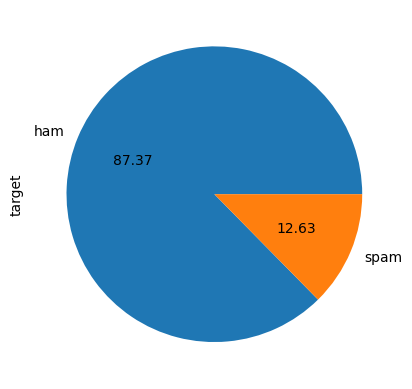

In [103]:
df["target"].value_counts().plot(kind="pie",labels=["ham","spam"],autopct="%0.2f")
plt.show()

# **Data is Imbalance**

getting the insight about how many character and words is being used in the text values.


In [104]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ankit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
#make the new column of num_character of total number of character used in the single values of text.
df["num_char"]=df["text"].apply(len)

In [106]:
# fetch the number of words used in the sentence.
df["num_words"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [107]:
# fetch the number of sentence used in individual raws.
df["num_sentences"]=df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [108]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [109]:
df[["num_char","num_words","num_sentences"]].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


# **Insight of num_char,num_words,num_sentences columns**
- **num_char**
    - max character used in a row  value is : **910**
    - minimum character used in row value is :**2** (very less number).
    - average mean is **80** character with standard deviation **58.23** .

- **num_words**
    - maximum words used in a sentence is : **220**
    - minimum words used in a sentence is : **1**
    - average mean is **18.45** with standard deviation **13.32**.

- **num_sentences**
    - maximum sentences number is : **38**
    - minimum sentences number is : **1**
    - average mean is **2** with standard deviation **1.5**
        

In [110]:
# now getting or fetching the insights with target values.
# This is for ham messages.
df[df["target"]== 0][["num_char","num_words","num_sentences"]].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [111]:
# This is for spam messages.
df[df["target"]== 1][["num_char","num_words","num_sentences"]].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


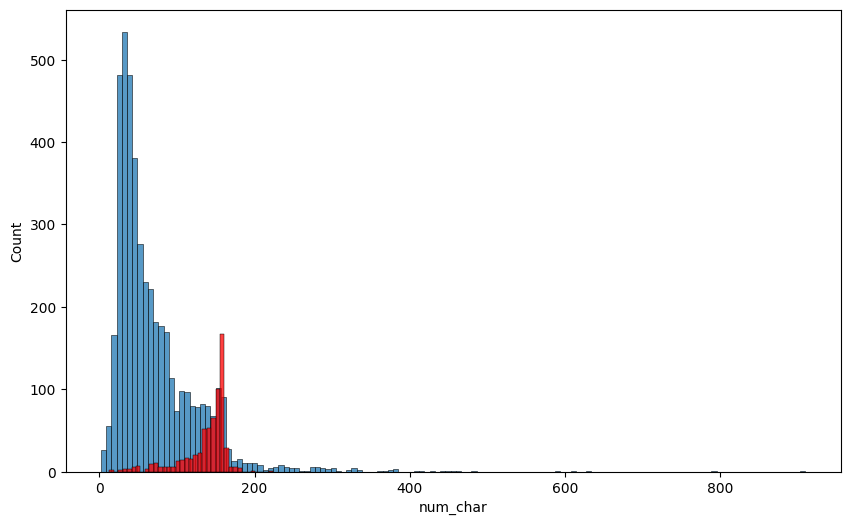

In [112]:
# ploting the histogram on top of distribution of spam and ham messages.

plt.figure(figsize=(10,6))
sns.histplot(data=df[df["target"]==0]["num_char"])
sns.histplot(data=df[df["target"]==1]["num_char"],color="Red")
plt.show()

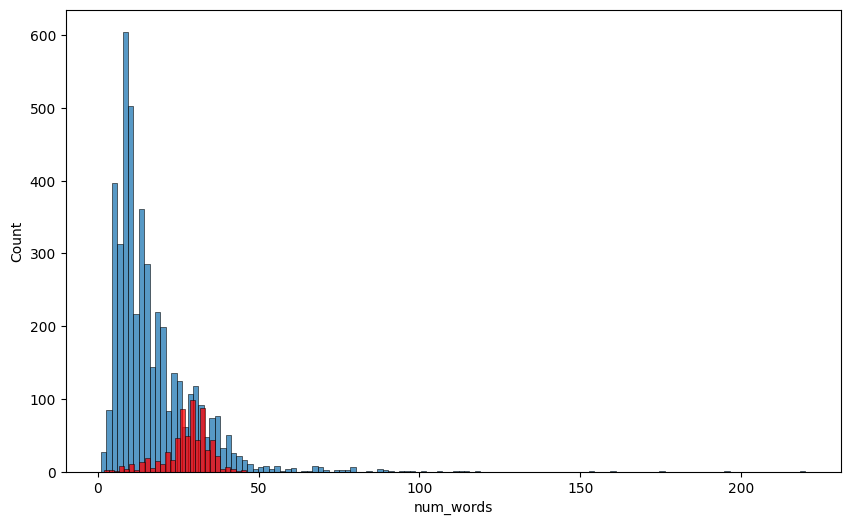

In [113]:
#plot the distribution of numbers of words in the rows data with respect to spam or ham messages.
plt.figure(figsize=(10,6))
sns.histplot(data=df[df["target"]==0]["num_words"])
sns.histplot(data=df[df["target"]==1]["num_words"],color="Red")
plt.show()

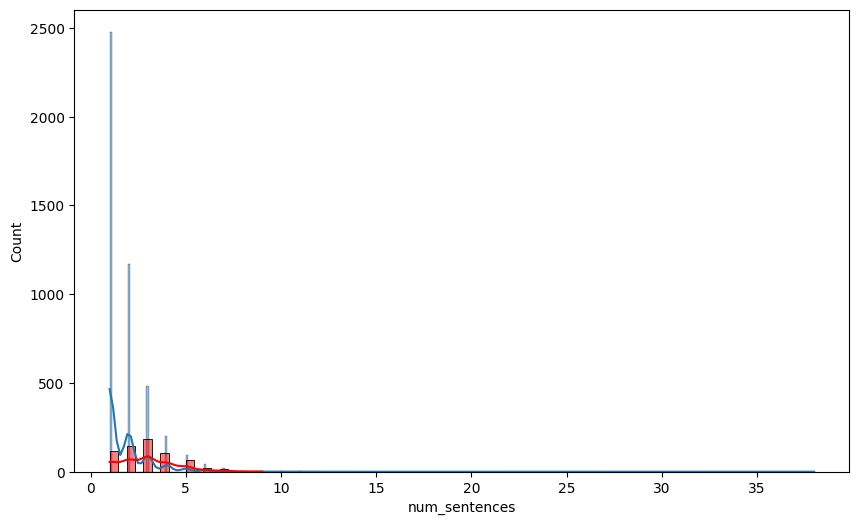

In [114]:
#plot the distribution of numbers of sentences in the rows data with respect to spam or ham messages.
plt.figure(figsize=(10,6))
sns.histplot(data=df[df["target"]==0]["num_sentences"],kde=True)
sns.histplot(data=df[df["target"]==1]["num_sentences"],color="Red",kde=True)
plt.show()

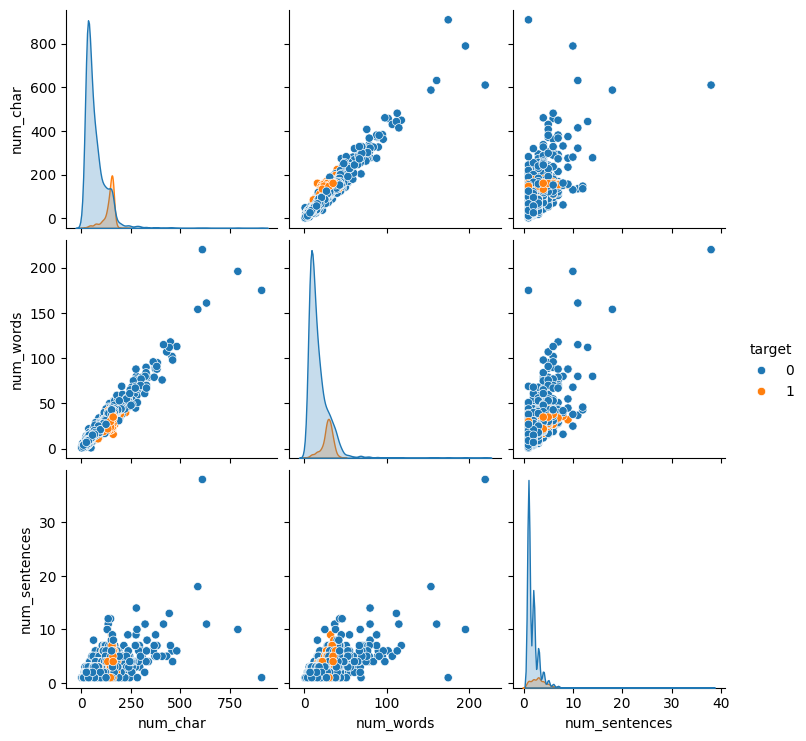

In [115]:
sns.pairplot(df,hue="target")

/tmp/ipykernel_11851/171061537.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


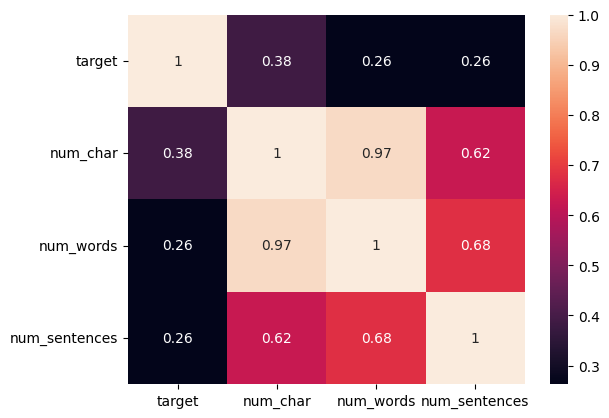

In [116]:
# find the pearson correlation between the columns.
sns.heatmap(df.corr(),annot=True)
plt.show()

- # Data Preprocessing 
    - Lower case
    - Tokenization
    - Removing special characters
    - Removing stop words and punctuation
    - Stemming
    

In [117]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ankit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [119]:
def transform_text(text:str):
    # convert the text to lower case
    text=text.lower()
    #convert the text into tokenization means break into words.
    text=nltk.word_tokenize(text)
    # removing the special character , wheras now text is a list.
    text_list=[]
    for i in text:
        if i.isalnum():
            text_list.append(i)
    text=text_list[:]
    text_list.clear()

    #Now removing stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            text_list.append(i)

    # reassign the text using the text_list[:]
    text=text_list[:]
    text_list.clear()
    for i in text:
        text_list.append(ps.stem(i))

    # Now we have to join this with string to make string.

    return " ".join(text_list)

In [120]:
df["transformed_text"]=df["text"].apply(transform_text)

In [121]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [122]:
# make a word cloud for bigger words
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="black")

In [123]:
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

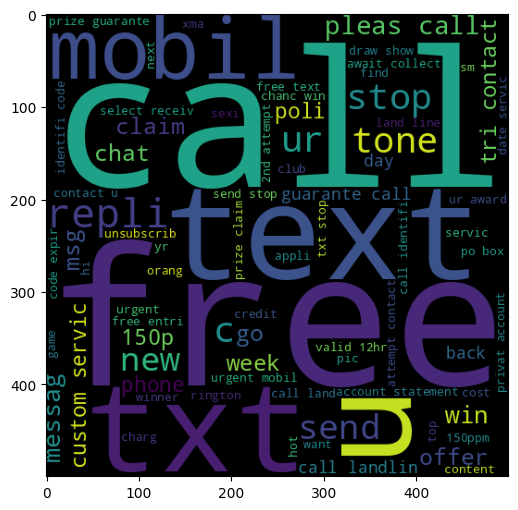

In [124]:
plt.figure(figsize=(16,6))
plt.imshow(spam_wc)

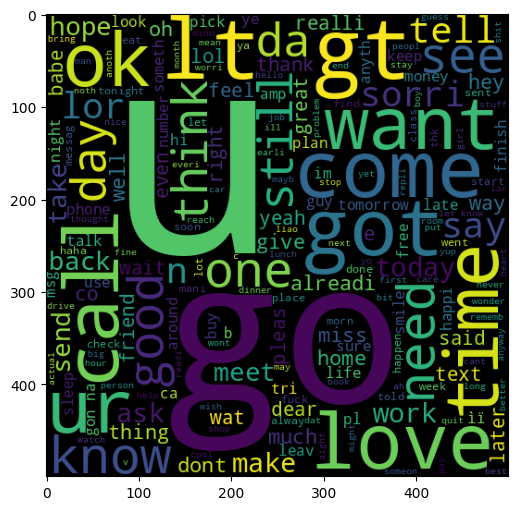

In [125]:
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)

In [126]:
spam_corpus=[]
for sentence in df[df["target"]==1]["transformed_text"].tolist():
    for word in sentence.split():
        spam_corpus.append(word)

In [127]:
len(spam_corpus)

9939

In [128]:
Ham_corpus=[]
for sentence in df[df["target"]==0]["transformed_text"].tolist():
    for word in sentence.split():
        Ham_corpus.append(word)

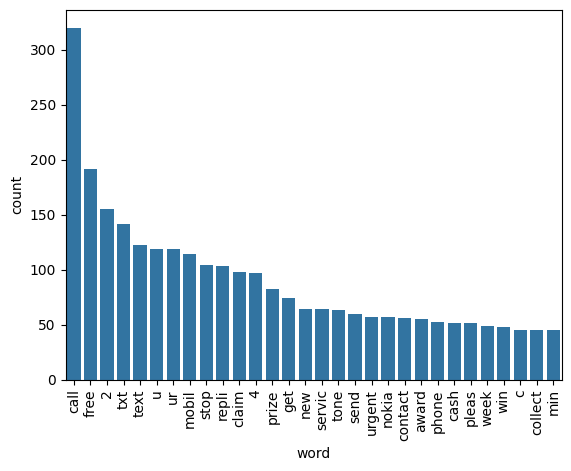

In [129]:
from collections import Counter
most_comman_word=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=["word","count"])
sns.barplot(x="word",y="count",data=most_comman_word)
plt.xticks(rotation="vertical")
plt.show()


In [130]:
len(Ham_corpus)

35404

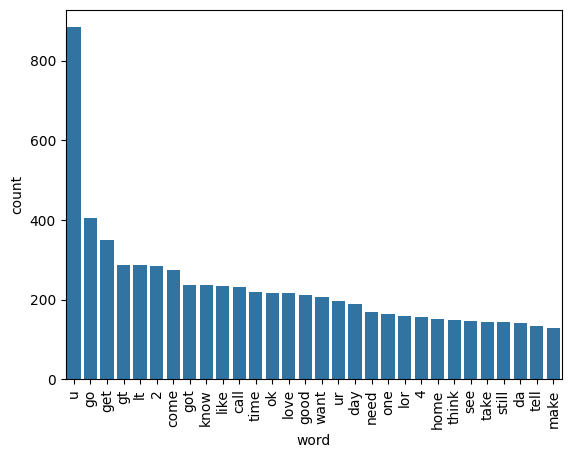

In [131]:
most_comman_word=pd.DataFrame(Counter(Ham_corpus).most_common(30),columns=["word","count"])
sns.barplot(x="word",y="count",data=most_comman_word)
plt.xticks(rotation="vertical")
plt.show()

In [132]:
# Model Building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [133]:
X=cv.fit_transform(df["transformed_text"]).toarray()

In [134]:
X1=tfidf.fit_transform(df["transformed_text"]).toarray()

In [135]:
X.shape

(5169, 6708)

In [136]:
y=df["target"].values

In [137]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=2)



In [139]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [140]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [141]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [142]:
gnb.fit(X_train,y_train)
y_predict=gnb.predict(X_test)
print(accuracy_score(y_test,y_predict))


0.8762088974854932


In [143]:
precision_score(y_test,y_predict)

0.5231481481481481

In [144]:
confusion_matrix(y_test,y_predict)

array([[793, 103],
       [ 25, 113]])

In [145]:
mnb.fit(X_train,y_train)
y_predict=mnb.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [146]:
bnb.fit(X_train,y_train)
y_predict=bnb.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [147]:
#tfiodf
gnb.fit(X_train,y_train)
y_predict=gnb.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.8762088974854932
0.5231481481481481
[[793 103]
 [ 25 113]]


In [148]:
#tfidf
mnb.fit(X_train,y_train)
y_predict=mnb.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [149]:
#tfidf
bnb.fit(X_train,y_train)
y_predict=bnb.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))


0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [150]:
#tfidf --> MNB

In [151]:
! pip install xgboost

In [152]:
#using anothers algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [153]:
svc=SVC(kernel="sigmoid",gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimator=50,randome_state=2)

In [154]:
model_dict={
    "svc":svc,
    "knc":knc,
    "mnb":mnb,
    "dtc":dtc,
    "lrc":lrc,
    "rfc":rfc,
    "bc":bc,
    "etc":etc,
    "gbc":gbc,
    "xgb":xgb

}

In [155]:
def training_pipeline(model_obj,X_train,y_train,X_test,y_test):
    model_obj.fit(X_train,y_train)
    y_pred=model_obj.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [157]:
model_names=[]
accuracy_list=[]
precision_list=[]
for model_name,model in model_dict.items():
    accuracy,precision=training_pipeline(model,X_train,y_train,X_test,y_test)

    print(accuracy)
    print(precision)
    model_names.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)

evualte_dataframe=pd.DataFrame({"model:name":model_names,"accuracy_score":accuracy_list,"precision_score":precision_list}).sort_values("precision_score",ascending=False)

0.9729206963249516
0.9741379310344828
0.9003868471953579
1.0
0.9593810444874274
1.0
0.9352030947775629
0.8380952380952381
0.9516441005802708
0.94
0.971953578336557
1.0
0.9584139264990329
0.8625954198473282
0.9729206963249516
0.9824561403508771
0.9526112185686654
0.9238095238095239


/home/ankit/Email_spam_classifier/env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator", "randome_state" } are not used.

  warnings.warn(smsg, UserWarning)


0.9748549323017408
0.9375


In [159]:

evualte_dataframe=pd.DataFrame({"model:name":model_names,"accuracy_score":accuracy_list,"precision_score":precision_list}).sort_values("precision_score",ascending=False)

In [160]:
evualte_dataframe

,model:name,accuracy_score,precision_score
1,knc,0.900387,1.000000
2,mnb,0.959381,1.000000
5,rfc,0.971954,1.000000
7,etc,0.972921,0.982456
0,svc,0.972921,0.974138
4,lrc,0.951644,0.940000
9,xgb,0.974855,0.937500
8,gbc,0.952611,0.923810
6,bc,0.958414,0.862595
3,dtc,0.935203,0.838095


In [169]:
#hyperparameter tuning by adding the max_features in CountVector or tfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000)
X2=tfidf.fit_transform(df["transformed_text"]).toarray()
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=2)


#-----------------------------------------------------------------------------------
model_names=[]
accuracy_list=[]
precision_list=[]
for model_name,model in model_dict.items():
    accuracy,precision=training_pipeline(model,X_train,y_train,X_test,y_test)

    print(accuracy)
    print(precision)
    model_names.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)



0.9690522243713733
0.9568965517241379
0.9168278529980658
1.0
0.9777562862669246
0.9914529914529915
0.9381044487427466
0.8627450980392157
0.9613152804642167
0.9622641509433962
0.9738878143133463
0.944
0.965183752417795
0.9047619047619048
0.97678916827853
0.9523809523809523
0.9535783365570599
0.9411764705882353


/home/ankit/Email_spam_classifier/env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:24:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator", "randome_state" } are not used.

  warnings.warn(smsg, UserWarning)


0.9729206963249516
0.9508196721311475


In [170]:
evaluate_df=pd.DataFrame({"model:name":model_names,"accuracy_max_ft:1000":accuracy_list,"precision_max_ft:1000":precision_list}).sort_values("precision_max_ft:1000",ascending=False)
evaluate_df

,model:name,accuracy_max_ft:1000,precision_max_ft:1000
1,knc,0.916828,1.000000
2,mnb,0.977756,0.991453
4,lrc,0.961315,0.962264
0,svc,0.969052,0.956897
7,etc,0.976789,0.952381
9,xgb,0.972921,0.950820
5,rfc,0.973888,0.944000
8,gbc,0.953578,0.941176
6,bc,0.965184,0.904762
3,dtc,0.938104,0.862745


In [171]:
evualte_dataframe=evualte_dataframe.merge(evaluate_df,on="model:name")

In [172]:
#hyperparameter tuning by adding the max_features in CountVector or tfidfVectorizer
tfidf=TfidfVectorizer(max_features=2000)
X2=tfidf.fit_transform(df["transformed_text"]).toarray()
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=2)


#-----------------------------------------------------------------------------------
model_names=[]
accuracy_list=[]
precision_list=[]
for model_name,model in model_dict.items():
    accuracy,precision=training_pipeline(model,X_train,y_train,X_test,y_test)

    print(accuracy)
    print(precision)
    model_names.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)


0.9758220502901354
0.9669421487603306
0.9081237911025145
1.0
0.97678916827853
1.0
0.9342359767891683
0.8365384615384616
0.9574468085106383
0.9607843137254902
0.9748549323017408
0.9666666666666667
0.9564796905222437
0.849624060150376
0.9777562862669246
0.9752066115702479
0.9526112185686654
0.9320388349514563


/home/ankit/Email_spam_classifier/env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:25:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator", "randome_state" } are not used.

  warnings.warn(smsg, UserWarning)


0.9738878143133463
0.9586776859504132


In [ ]:
evaluate_df=pd.DataFrame({"model:name":model_names,"accuracy_max_ft:2000":accuracy_list,"precision_max_ft:2000":precision_list}).sort_values("precision_max_ft:2000",ascending=False)
evualte_dataframe=evualte_dataframe.merge(evaluate_df,on="model:name")


,model:name,accuracy_score,precision_score,accuracy_max_ft:1000,precision_max_ft:1000,accuracy_max_ft:2000,precision_max_ft:2000
0,knc,0.900387,1.000000,0.916828,1.000000,0.908124,1.000000
1,mnb,0.959381,1.000000,0.977756,0.991453,0.976789,1.000000
2,rfc,0.971954,1.000000,0.973888,0.944000,0.974855,0.966667
3,etc,0.972921,0.982456,0.976789,0.952381,0.977756,0.975207
4,svc,0.972921,0.974138,0.969052,0.956897,0.975822,0.966942
5,lrc,0.951644,0.940000,0.961315,0.962264,0.957447,0.960784
6,xgb,0.974855,0.937500,0.972921,0.950820,0.973888,0.958678
7,gbc,0.952611,0.923810,0.953578,0.941176,0.952611,0.932039
8,bc,0.958414,0.862595,0.965184,0.904762,0.956480,0.849624
9,dtc,0.935203,0.838095,0.938104,0.862745,0.934236,0.836538


In [174]:
#hyperparameter tuning by adding the max_features in CountVector or tfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
X2=tfidf.fit_transform(df["transformed_text"]).toarray()
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=2)


#-----------------------------------------------------------------------------------
model_names=[]
accuracy_list=[]
precision_list=[]
for model_name,model in model_dict.items():
    accuracy,precision=training_pipeline(model,X_train,y_train,X_test,y_test)

    print(accuracy)
    print(precision)
    model_names.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)


0.9758220502901354
0.9747899159663865
0.9052224371373307
1.0
0.9709864603481625
1.0
0.9303675048355899
0.8367346938775511
0.9584139264990329
0.9702970297029703
0.9758220502901354
0.9829059829059829
0.9584139264990329
0.8682170542635659
0.9748549323017408
0.9745762711864406
0.9468085106382979
0.9191919191919192


/home/ankit/Email_spam_classifier/env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:27:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator", "randome_state" } are not used.

  warnings.warn(smsg, UserWarning)


0.971953578336557
0.943089430894309


In [177]:
evaluate_df=pd.DataFrame({"model:name":model_names,"accuracy_max_ft:3000":accuracy_list,"precision_max_ft:3000":precision_list}).sort_values("precision_max_ft:3000",ascending=False)
evualte_dataframe=evualte_dataframe.merge(evaluate_df,on="model:name")

In [178]:
evualte_dataframe

,model:name,accuracy_score,precision_score,accuracy_max_ft:1000,precision_max_ft:1000,accuracy_max_ft:3000,precision_max_ft:3000
0,knc,0.900387,1.000000,0.916828,1.000000,0.905222,1.000000
1,mnb,0.959381,1.000000,0.977756,0.991453,0.970986,1.000000
2,rfc,0.971954,1.000000,0.973888,0.944000,0.975822,0.982906
3,etc,0.972921,0.982456,0.976789,0.952381,0.974855,0.974576
4,svc,0.972921,0.974138,0.969052,0.956897,0.975822,0.974790
5,lrc,0.951644,0.940000,0.961315,0.962264,0.958414,0.970297
6,xgb,0.974855,0.937500,0.972921,0.950820,0.971954,0.943089
7,gbc,0.952611,0.923810,0.953578,0.941176,0.946809,0.919192
8,bc,0.958414,0.862595,0.965184,0.904762,0.958414,0.868217
9,dtc,0.935203,0.838095,0.938104,0.862745,0.930368,0.836735
